# 8.1 Định nghĩa về đồ thị

Đồ thị là được biểu diễn bằng hình ảnh của một tập hợp các đối tượng trong đó một số cặp đối tượng được nối với nhau bằng các liên kết. Các đối tượng liên kết được biểu diễn bằng các điểm được gọi là **đỉnh(vertex)** và các liên kết nối các đỉnh được gọi là các **cạnh(edge).**

<img align="left" width="400" height="400" src="images/Graph.png">


**Đồ thị có hướng (directed graph)**: Mỗi cạnh được xác định bởi đỉnh bắt đầu và đỉnh kết thúc của nó. Có n sự lựa chọn cho đỉnh bắt đầu. Vì không có tự vòng lặp nên có n-1 sự lựa chọn cho đỉnh kết thúc. Nhân chúng với nhau ta có n (n-1) tất cả các lựa chọn có thể.

**Đồ thị vô hướng (undirected graph)**: Trong một đồ thị vô hướng, mỗi cạnh được xác định bởi hai điểm cuối của nó và thứ tự không quan trọng. Do đó, số lượng các cạnh là số lượng các tập con có kích thước 2 được chọn từ tập các đỉnh. Vì tập các đỉnh có kích thước n nên số lượng các tập con đó được cho bởi hệ số nhị thức C (n, 2) (còn được gọi là "n chọn 2"). 

Sử dụng công thức cho hệ số nhị thức: C (n, 2) = n (n-1) / 2


<img align="left" width="500" height="500" src="https://miro.medium.com/max/1200/1*HpYMnHjGZWmH9NKRG05lAg.jpeg">


**Đồ thị đầy (dense graph)**: Là đồ thị có số cung gần bằng nx(n-1) hoặc có số cạnh gần bằng (nx(n-1))/2 với n là số đỉnh của đồ thị. Ngược lại sẽ là **đồ thị thưa (sparse graph).**

<img align="left" width="500" height="500" src="https://miro.medium.com/max/1212/1*oqlShfFGSxt8vHXHK-a8SQ.png">


# 8.2 Tạo đồ thị

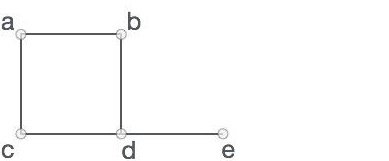

**Trong đó:**

Tập V là tập các đỉnh gồm có {a, b, c, d, e}

Tập E(u,v) là các cung với u, v thuộc tập V là các đỉnh nguồn và đỉnh đích gồm có {ab, ac ,bd, cd, de}

## Các thao tác với đồ thị
+ Khởi tạo đồ thị
+ Tìm kiếm một đỉnh của đồ thị
+ Thêm một đỉnh vào đồ thị
+ Loại bỏ một đỉnh từ đồ thị
+ Tìm kiếm một cung của đồ thị
+ Hiển thị đồ thị

In [1]:
graph = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d"]
}
print(graph)

{'a': ['b', 'c'], 'b': ['a', 'd'], 'c': ['a', 'd'], 'd': ['e'], 'e': ['d']}


### Tìm các đỉnh của đồ thị

In [2]:
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = []
        self.gdict = gdict
# Lấy các khóa của dictionary là đỉnh
    def getVertices(self):
        return list(self.gdict.keys())

graph_elements = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d"]
}
g = graph(graph_elements)
print(g.getVertices())

['a', 'b', 'c', 'd', 'e']


### Các cạnh của graph
Việc tìm các cạnh của đồ thị khó hơn so với các đỉnh vì chúng ta phải tìm từng cặp đỉnh có một cạnh ở giữa chúng. Vì vậy, chúng tôi tạo một danh sách trống các cạnh sau đó lặp qua các giá trị cạnh được liên kết với mỗi đỉnh. Một danh sách được hình thành có chứa nhóm cạnh khác biệt được tìm thấy từ các đỉnh.

In [3]:
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict

    def edges(self):
        return self.findedges()
# Tìm danh sách các cạnh riêng biệt
    def findedges(self):
        edgename = []
        for vrtx in self.gdict:
            for nxtvrtx in self.gdict[vrtx]:
                if {nxtvrtx, vrtx} not in edgename:
                    edgename.append({vrtx, nxtvrtx})
        return edgename
    
graph_elements = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d"]
}
g = graph(graph_elements)
print(g.edges())

[{'b', 'a'}, {'c', 'a'}, {'b', 'd'}, {'c', 'd'}, {'e', 'd'}]


### Thêm một đỉnh

In [4]:
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    def getVertices(self):
        return list(self.gdict.keys())
    def addVertex(self, vrtx):
        if vrtx not in self.gdict:
            self.gdict[vrtx] = []

graph_elements = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d"]
}
g = graph(graph_elements)
g.addVertex("f")
print(g.getVertices())

['a', 'b', 'c', 'd', 'e', 'f']


### Thêm một cạnh

In [5]:
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    def edges(self):
        return self.findedges()
    def AddEdge(self, edge):
        edge = set(edge)
        (vrtx1, vrtx2) = tuple(edge)
        if vrtx1 in self.gdict:
            self.gdict[vrtx1].append(vrtx2)
        else:
            self.gdict[vrtx1] = [vrtx2]
# Tìm danh sách các cạnh
    def findedges(self):
        edgename = []
        for vrtx in self.gdict:
            for nxtvrtx in self.gdict[vrtx]:
                if {nxtvrtx, vrtx} not in edgename:
                    edgename.append({vrtx, nxtvrtx})
        return edgename
graph_elements = { 
   "a" : ["b","c"],
   "b" : ["a", "d"],
   "c" : ["a", "d"],
   "d" : ["e"],
   "e" : ["d"]
}
g = graph(graph_elements)
g.AddEdge({'a','e'})
g.AddEdge({'a','c'})
print(g.edges())

[{'b', 'a'}, {'c', 'a'}, {'b', 'd'}, {'c', 'd'}, {'e', 'd'}, {'e', 'a'}]


# 8.3 Các thuật toán duyệt của đồ thị

Đồ thị là cấu trúc dữ liệu rất hữu ích trong việc giải quyết nhiều thách thức toán học quan trọng. Ví dụ cấu trúc liên kết mạng máy tính hoặc phân tích cấu trúc phân tử của các hợp chất hóa học. Chúng cũng được sử dụng trong giao thông thành phố hoặc lập kế hoạch tuyến đường. Tất cả các ứng dụng này đều có một thách thức chung là duyệt qua đồ thị bằng cách sử dụng các cạnh của chúng và đảm bảo rằng tất cả các nút của đồ thị đều được truy cập. Có hai phương pháp phổ biến là **Depth First Search** và **Breadth First Search.**

## DFS(Depth First  Search)

Còn được gọi là tìm kiếm đầu tiên theo độ sâu (DFS), thuật toán này duyệt qua một đồ thị theo chuyển động phường độ sâu và sử dụng một ngăn xếp để ghi nhớ để lấy đỉnh tiếp theo để bắt đầu tìm kiếm, khi một điểm cuối xảy ra trong bất kỳ lần lặp nào. Chúng tôi triển khai DFS cho biểu đồ trong python bằng cách sử dụng các kiểu dữ liệu dictionary vì chúng cung cấp các chức năng cần thiết để theo dõi các nút đã truy cập và chưa truy cập.
<img align="left" width="500" height="500" src="images/DFS.jpg">


In [6]:
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
# Kiểm tra node đã được duyệt hay chưa
def dfs(graph, start, visited = None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

gdict = { 
   "a" : set(["b","c"]),
   "b" : set(["a", "d"]),
   "c" : set(["a", "d"]),
   "d" : set(["e"]),
   "e" : set(["a"])
}
dfs(gdict, 'a')

a
b
d
e
c


{'a', 'b', 'c', 'd', 'e'}

## BFS (Breadth First Search)

Còn được gọi là tìm kiếm đầu tiên theo chiều rộng (BFS), thuật toán này truyền qua chuyển động phường theo chiều rộng của đồ thị và sử dụng một hàng đợi để nhớ để lấy đỉnh tiếp theo để bắt đầu tìm kiếm, khi một điểm cuối xảy ra trong bất kỳ lần lặp nào.

Chúng tôi triển khai BFS cho một biểu đồ trong python bằng cách sử dụng cấu trúc dữ liệu hàng đợi đã thảo luận trước đó. Khi chúng ta tiếp tục truy cập các nút không được truy cập liền kề và tiếp tục thêm nó vào hàng đợi. Sau đó, chúng tôi bắt đầu xếp hàng chỉ nút còn lại không có nút nào chưa được truy cập. Chúng tôi dừng chương trình khi không có nút liền kề tiếp theo được truy cập.

<img align="left" width="500" height="500" src="images/BFS.jpg">

In [7]:
import collections
class graph:
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
def bfs(graph, startnode):
# Theo dõi visited và unvisited nodes sử dụng hàng đợi queue
    seen, queue = set([startnode]), collections.deque([startnode])
    while queue:
        vertex = queue.popleft()
        marked(vertex)
        for node in graph[vertex]:
            if node not in seen:
                seen.add(node)
                queue.append(node)
def marked(n):
    print(n)

gdict = { 
   "a" : set(["b","c"]),
   "b" : set(["a", "d"]),
   "c" : set(["a", "d"]),
   "d" : set(["e"]),
   "e" : set(["a"])
}
bfs(gdict, "a")

a
b
c
d
e


## 8.4 Bài toán tuyến đường trong thành phố
Hình bên dưới cho thấy các tuyến đường giữa các thành phố của một hãng hàng không cụ thể. Các vòng tròn trong hình đại diện cho các sân bay và các nhãn được liên kết đại diện cho tên mã sân bay (ví dụ: ATL là Sân bay Quốc tế HartsfieldJackson Atlanta gần Atlanta, Georgia). Một đường nối hai vòng tròn cho biết chuyến bay thẳng giữa hai sân bay.
<img align="left" width="600" height="600" src="images/Routes.jpg">

Hình ảnh sau khi loại bỏ biểu đồ map
<img align="left" width="600" height="600" src="images/Delete_map_routes.jpg">

Trong lý thuyết đồ thị toán học, vị trí của các đỉnh trong một hình dung của đồ thị là không
quan trọng. Đồ thị này tương đương là
<img align="left" width="600" height="600" src="images/Adjust_routes.jpg">

## Tạo đồ thị tuyến đường

In [8]:
routes = {
"ATL": {"MIA", "DCA", "ORD", "MCI", "DFW", "DEN"},
"MIA": {"LGA", "DCA", "ATL", "DFW"},
"DFW": {"LAX", "DEN", "MCI", "ORD", "ATL", "MIA"},
"LAX": {"SFO", "DEN", "MCI", "DFW"},
"DEN": {"SFO", "LAX", "MCI", "DFW", "SEA", "ATL"},
"SEA": {"SFO", "DEN", "ORD", "LGA"},
"MCI": {"DEN", "LAX", "DFW", "ATL", "ORD", "LGA"},
"ORD": {"SEA", "MCI", "DFW", "ATL", "DCA", "LGA"},
"DCA": {"ORD", "ATL", "MIA", "LGA"},
"LGA": {"SEA", "MCI", "ORD", "DCA", "MIA"},
"SFO": {"SEA", "DEN", "LAX"}
}

## Xem các tuyến đường mà từ sân bay ATL có thể đi

In [9]:
for airport in routes["ATL"]:
    print(airport)

DFW
MCI
MIA
DCA
DEN
ORD


In [10]:
from queue import Queue
q = Queue ()
q.empty()

True

In [11]:
q.put(34)
q.empty()

False

In [12]:
q.put("Xin chào")
q.put([10, 20, 30]) 

In [13]:
q.get() 

34

In [14]:
q.get()

'Xin chào'

In [15]:
q.get()

[10, 20, 30]

In [16]:
q.empty()

True

## Sử dụng thuật toán BFS
<img align="left" width="600" height="600" src="images/BFS_routes.jpg">

In [17]:
from queue import Queue
def bfs(graph, start_vertex, end_vertex):
    """ Performs a breadth-first traversal of graph originating
    at start_vertex and ending when the traversal encounters
    end_vertex. Builds and returns a dictionary with
    vertices mapped to their immediate predecessors on the
    breadth-first traversal."""
# A dictionary of vertex predecessors encountered on a breadth-first
# traversal from start_vertex to end_vertex.
# The dictionary key is a vertex, and the associated value is
# the vertex that comes immediately before the key on a
# breadth-first traversal.
# This dictionary initially is empty, and we will add vertices as
# we "visit" them during the breadth-first traversal.
    predecessor = {}
    # Make an empty queue and insert the starting vertex
    # The algorithm will extract and visit vertices from this queue
    q = Queue()
    q.put(start_vertex)
    # Keep searching while the queue holds vertices yet to visit
    # and we have yet to visit our destination vertex
    while not q.empty() and end_vertex not in predecessor:
        vertex = q.get() # Get vertex on the front of the queue
        for adjacent_vertex in graph[vertex]: # Consider all adjacent vertices
    # Has the predecessor of this vertex been established?
            if adjacent_vertex not in predecessor:
                q.put(adjacent_vertex) # Enqueue the vertex
# Register which vertex should come immediately before this
# one on a shortest path (this "visits" the vertex)
                predecessor[adjacent_vertex] = vertex
    return predecessor

def find_path(graph, start_vertex, end_vertex):
    """ Builds a list of vertices in order along the shortest path
    from a starting vertex to an ending vertex in a graph.
    graph: The graph to traverse.
    start_vertex: The starting vertex.
    end_vertex: The vertex to locate. """
# Compute predecessor of each vertex on a shortest path
# Call the bfs function to build the predecessor dictionary
    predecessor = bfs(graph, start_vertex, end_vertex)
    path = [] # Path initially empty
# Check that we were able to reach the destination vertex
    if end_vertex in predecessor:
# Start at the end and work backwards
        path = [end_vertex]
        vertex = end_vertex
# Keep going until we get to the beginning of the path
        while vertex != start_vertex:
# Get vertex that comes immediately before on a shortest path
            vertex = predecessor[vertex]
# Prepend the predecessor vertex to the front of the path list
            path = [vertex] + path
    return path
def main():
    routes = {
    "ATL": {"MIA", "DCA", "ORD", "MCI", "DFW", "DEN"},
    "MIA": {"LGA", "DCA", "ATL", "DFW"},
    "DFW": {"LAX", "DEN", "MCI", "ORD", "ATL", "MIA"},
    "LAX": {"SFO", "DEN", "MCI", "DFW"},
    "DEN": {"SFO", "LAX", "MCI", "DFW", "SEA", "ATL"},
    "SEA": {"SFO", "DEN", "ORD", "LGA"},
    "MCI": {"DEN", "LAX", "DFW", "ATL", "ORD", "LGA"},
    "ORD": {"SEA", "MCI", "DFW", "ATL", "DCA", "LGA"},
    "DCA": {"ORD", "ATL", "MIA", "LGA"},
    "LGA": {"SEA", "MCI", "ORD", "DCA", "MIA"},
    "SFO": {"SEA", "DEN", "LAX"},
    "CLT": {"BNA", "CHA"},
    "BNA": {"CLT", "CHA"},
    "CHA": {"CLT", "BNA"}
    }
    print(find_path(routes, "LAX", "DCA"))
    print(find_path(routes, "MIA", "SFO"))
    print(find_path(routes, "ATL", "MIA"))
    print(find_path(routes, "LGA", "LGA"))
    print(find_path(routes, "CLT", "BNA"))
    print(find_path(routes, "BNA", "ATL"))
if __name__ == "__main__":
    main()

['LAX', 'MCI', 'LGA', 'DCA']
['MIA', 'DFW', 'LAX', 'SFO']
['ATL', 'MIA']
['LGA']
['CLT', 'BNA']
[]


## Sử dụng DFS

In [18]:
s=[]
len(s)<=0

True

In [19]:
s.append(34)

In [20]:
s.append("Hello")
s.append(12)
s.append([10, 20, 30])
s.pop()

[10, 20, 30]

In [21]:
s.pop()

12

In [22]:
s.pop()

'Hello'

In [23]:
s.pop()

34

In [24]:
len(s)

0

<img align="left" width="600" height="600" src="images/DFS_routes.jpg">

In [25]:
def dfs(graph, start_vertex=None, end_vertex=None):
    """ Performs a depth-first traversal of graph originating
    at start_vertex and ending when the traversal encounters
    end_vertex. If the end_vertex parameter is omitted, the
    DFS continues to all vertices in the graph. If the
    start_vertex parameter is omitted, the DFS begins with an
    arbitrary vertex in the graph. Builds and returns a set of
    vertices discovered during the depth-first traversal. """
    # A set of vertices encountered on a depth-first
    # traversal from start_vertex to end_vertex.
    # This set initially is empty, and we will add vertices as
    # we "visit" them during the depth-first traversal.
    visited = set()
    if graph:
        if not start_vertex: # Caller provided a starting vertex
            start_vertex = list(graph.keys())[0] # Grab an arbitrary vertex from the graph
    #print("Start vertex:", start_vertex)
    # Make an empty stack and insert the starting vertex
    # The algorithm will extract and visit vertices from this stack
        s = []
        s.append(start_vertex)
    # Keep searching while the stack holds vertices yet to visit
    # and we have yet to visit our destination vertex
        while len(s) > 0 and end_vertex not in visited:
            vertex = s.pop() # Get vertex on the top of the stack
            if vertex not in visited:
                visited.add(vertex) # Visit the vertex
                for adjacent_vertex in graph[vertex]: # Consider all adjacent vertices
                    # Has the predecessor of this vertex been established?
                    if adjacent_vertex not in visited:
                        s.append(adjacent_vertex) # Push the vertex
        # At this point we exited the while loop because either the stack was
        # empty or the destination vertex now is in the visited set (or both).
        # If the stack is empty but the destination vertex is not in
        # the visited set, the destination vertex is unreachable from the
        # starting vertex. If the stack is not empty but the destination vertex
        # is in the visited set, the path from the starting vertex to
        # the destination vertex exists and excludes one or more vertices in
        # the graph. If the stack is empty and the destination vertex is in the
        # visited set, the shortest path from the starting vertex to the
        # destination vertex includes all vertices reachable from the starting
        # vertex.
    return visited
def dfs2(graph, start_vertex=None, end_vertex=None):
    """ Performs a depth-first traversal of graph originating
    at start_vertex and ending when the traversal encounters
    end_vertex. If the end_vertex parameter is omitted, the
    DFS continues to all vertices in the graph. If the
    start_vertex parameter is omitted, the DFS begins with an
    arbitrary vertex in the graph. Builds and returns a set of
    vertices discovered during the depth-first traversal. """
    # A set of vertices encountered on a depth-first
    # traversal from start_vertex to end_vertex.
    # This set initially is empty, and we will add vertices as
    # we "visit" them during the depth-first traversal.
    visited = set()
def dfs3(start_vertex, end_vertex):
    visited.add(start_vertex)
    for adjacent_vertex in graph[start_vertex]:
        if adjacent_vertex not in visited and end_vertex not in visited:
            dfs3(adjacent_vertex, end_vertex)
    if graph:
        if not start_vertex: # Caller provided a starting vertex?
            start_vertex = list(graph.keys())[0] # Grab an arbitrary vertex from the graph
        dfs3(start_vertex, end_vertex) # Build the visited set
    return visited
def bfs(graph, start_vertex=None, end_vertex=None):
    """ Performs a breadth-first traversal of graph originating
    at start_vertex and ending when the traversal encounters
    end_vertex. If the end_vertex parameter is omitted, the
    BFS continues to all vertices in the graph. If the
    start_vertex parameter is omitted, the BFS begins with an
    arbitrary vertex in the graph.
    Builds and returns a dictionary with
    vertices mapped to their immediate predecessors on the
    breadth-first traversal. """
    # A dictionary of vertex predecessors encountered on a breadth-first
    # traversal from start_vertex to end_vertex.
    # The dictionary key is a vertex, and the associated value is
    # the vertex that comes immediately before the key on a
    # breadth-first traversal.
    # This dictionary initially is empty, and we will add vertices as
    # we "visit" them during the breadth-first traversal.
    predecessor = {}
    if graph:
        if not start_vertex: # Caller provided a starting vertex?
            start_vertex = list(graph.keys())[0] # Grab an arbitrary vertex from the graph
            #print("Start vertex:", start_vertex)
            # Make an empty queue and insert the starting vertex
            # The algorithm will extract and visit vertices from this queue
        q = Queue()
        q.put(start_vertex)
            # Keep searching while the queue holds vertices yet to visit
            # and we have yet to visit our destination vertex
        while not q.empty() and end_vertex not in predecessor:
            vertex = q.get() # Get vertex on the front of the queue
            for adjacent_vertex in graph[vertex]: # Consider all adjacent vertices
                    # Has the predecessor of this vertex been established?
                if adjacent_vertex not in predecessor:
                    q.put(adjacent_vertex) # Enqueue the vertex
                    # Register which vertex should come immediately before this
                    # one on a shortest path (this "visits" the vertex)
                    #print(adjacent_vertex, "<--", vertex)
                    predecessor[adjacent_vertex] = vertex
                    # At this point we exited the while loop because either the queue was
                    # empty or the destination vertex now is in the predecessor dictionary
                    # (or both). If the queue is empty but the destination vertex is not in
                                        # the predecessor dictionary, the destination vertex is unreachable from the
                    # starting vertex. If the queue is not empty but the destination vertex
                    # is in the predecessor dictionary, the path from the starting vertex to
                    # the destination vertex exists and excludes one or more vertices in
                    # the graph. If the queue is empty and the destination vertex is in the
                    # predecessor dictionary, the shortest path from the starting vertex to the
                    # destination vertex includes all vertices reachable from the starting
                    # vertex.
    return predecessor
def find_path(graph, start_vertex, end_vertex):
    """ Builds a list of vertices in order along the shortest path
    from a starting vertex to an ending vertex in a graph.
    graph: The graph to traverse.
    start_vertex: The starting vertex.
    end_vertex: The vertex to locate. """
    # Compute predecessor of each vertex on a shortest path
    # Call the bfs function to build the predecessor dictionary
    predecessor = bfs(graph, start_vertex, end_vertex)
    path = [] # Path initially empty
    # Check that we were able to reach the destination vertex
    if end_vertex in predecessor:
    # Start at the end and work backwards
        path = [end_vertex]
        vertex = end_vertex
        # Keep going until we get to the beginning of the path
        while vertex != start_vertex:
        # Get vertex that comes immediately before on a shortest path
            vertex = predecessor[vertex]
            # Prepend the predecessor vertex to the front of the path list
            path = [vertex] + path
    return path
def is_connected(G):
    """ Returns True if G is a dictionary representing a connected graph;
    otherwise, returns False. A graph containing no vertices
    (and, therefore, no edges) is considered connected. """
    # Use bfs to compute the predecessor of each vertex on a
    # shortest path from an arbitrary vertex within G.
    predecessor = dfs2(G)
    #predecessor = bfs(G)
    for vertex in G:
        if vertex not in predecessor:
            return False
    return True
def is_connected2(G):
    """ G is a dictionary that represents a graph. """
    for v in G: # Examine each dictionary key (vertex)
        for w in G: # Examine each dictionary key (vertex)
            if v != w and w not in bfs(G, v, w):
                return False # Vertex w not reachable from vertex v
    return True # All vertices in G are reachable from any vertex in G
def main():
    """ Tests the find_path and is_connected functions. """
    # Dictionary representing the graph of airline routes
    routes = {
    "ATL": {"MIA", "DCA", "ORD", "MCI", "DFW", "DEN"},
    "MIA": {"LGA", "DCA", "ATL", "DFW"},
    "DFW": {"LAX", "DEN", "MCI", "ORD", "ATL", "MIA"},
    "LAX": {"SFO", "DEN", "MCI", "DFW"},
    "DEN": {"SFO", "LAX", "MCI", "DFW", "SEA", "ATL"},
    "SEA": {"SFO", "DEN", "ORD", "LGA"},
    "MCI": {"DEN", "LAX", "DFW", "ATL", "ORD", "LGA"},
    "ORD": {"SEA", "MCI", "DFW", "ATL", "DCA", "LGA"},
    "DCA": {"ORD", "ATL", "MIA", "LGA"},
    "LGA": {"SEA", "MCI", "ORD", "DCA", "MIA"},
    "SFO": {"SEA", "DEN", "LAX"},
    "CLT": {"BNA", "CHA"},
    "BNA": {"CLT", "CHA"},
    "CHA": {"CLT", "BNA"}
    }
    r1 = {
    "ATL": {"MIA", "DCA", "ORD", "MCI", "DFW", "DEN"},
    "MIA": {"LGA", "DCA", "ATL", "DFW"},
    "DFW": {"LAX", "DEN", "MCI", "ORD", "ATL", "MIA"},
    "LAX": {"SFO", "DEN", "MCI", "DFW"},
    "DEN": {"SFO", "LAX", "MCI", "DFW", "SEA", "ATL"},
    "SEA": {"SFO", "DEN", "ORD", "LGA"},
    "MCI": {"DEN", "LAX", "DFW", "ATL", "ORD", "LGA"},
    "ORD": {"SEA", "MCI", "DFW", "ATL", "DCA", "LGA"},
    "DCA": {"ORD", "ATL", "MIA", "LGA"},
    "LGA": {"SEA", "MCI", "ORD", "DCA", "MIA"},
    "SFO": {"SEA", "DEN", "LAX"}
    }
    r2 = {
    "CLT": {"BNA", "CHA"},
    "BNA": {"CLT", "CHA"},
    "CHA": {"CLT", "BNA"}
    }
    # Find shortest paths, as before
    print(find_path(routes, "LAX", "DCA"))
    print(find_path(routes, "MIA", "SFO"))
    print(find_path(routes, "ATL", "MIA"))
    print(find_path(routes, "LGA", "LGA"))
    print(find_path(routes, "CLT", "BNA"))
    print(find_path(routes, "BNA", "ATL"))
    # Check connectivity
    print("Connected: ", is_connected(routes), is_connected2(routes))
    print("Connected: ", is_connected(r1), is_connected2(r1))
    print("Connected: ", is_connected(r2), is_connected2(r2))
if __name__ == "__main__":
    main()

['LAX', 'MCI', 'LGA', 'DCA']
['MIA', 'DFW', 'LAX', 'SFO']
['ATL', 'MIA']
['LGA']
['CLT', 'BNA']
[]


TypeError: argument of type 'NoneType' is not iterable